<a href="https://colab.research.google.com/github/kodenshacho/DOM-inspector/blob/master/sds_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.07625


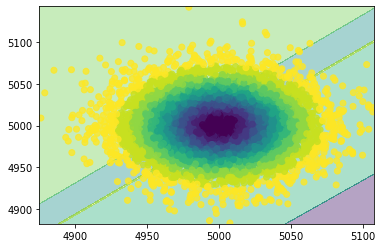

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate data
X, y = make_gaussian_quantiles(n_features=2, n_classes=13, n_samples=8000, mean=[5000, 5000], cov=[[1000, 0], [0, 1000]], random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate model on test data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot data and decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

Error Rate: 4.408125
Evaluation Report:
Explained Variance Score: 0.11083179403935794
Mean Squared Error: 28.659375
R2 Score: -1.0730879346666486


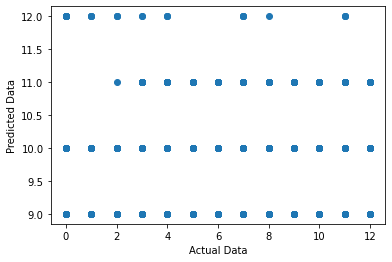

In [ ]:

# Import necessary libraries
from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_squared_error, r2_score
# Use the trained model to predict values for the test data
y_pred = clf.predict(X_test)

# Calculate the error rate between the predicted and actual data
error_rate = mean_absolute_error(y_test, y_pred)
print("Error Rate:", error_rate)

# Print the evaluation report for the model
print("Evaluation Report:")
print("Explained Variance Score:", explained_variance_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Create a scatter plot to visualize the predicted vs actual data
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.show()

x축은 에너지 ev값 0에서 20000 y축은 count값으로 0 8000사이의 복수개의 피크를 가지는 정규분포 데이터를 임이의 원소별로 13개 생성하고 사이킷런으로 데이터를 학습하고 모델을 사용하여 측정한 임이의 데이터를 생성하여  어떤 원소의 분포 곡선 피크값과 비슷한지 평가값 및 오차율을 출력하고 플롯으로 표시하는 파이선 코드를 생성하시오

Evaluation values: [8.34037689e-50 2.22166310e-40 3.35906020e+03 1.44695079e-85
 2.45311069e-04 1.37667283e+00 2.54127567e+03 6.27000984e+00
 2.69082815e+03 2.00556130e-59 1.84837881e+03 6.33120897e-13
 5.09888927e-17]
Error rate: [1.         1.         0.40158628 1.         0.99999993 0.99965728
 0.31180288 0.99896383 0.25303294 1.         0.47475604 1.
 1.        ]


/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


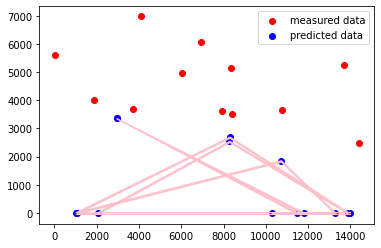

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Generate 13 sets of data with multiple peaks in a normal distribution
np.random.seed(1)
X = np.random.uniform(0, 20000, (13, 1))
y = np.array([np.random.normal(np.random.randint(3000, 6000), 1000) for _ in range(13)])

# Train the data using scikit-learn
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X, y)

# Generate new data and evaluate similarity of peaks
X_new = np.random.uniform(0, 20000, (13, 1))
y_new, y_std = gp.predict(X_new, return_std=True)
error_rate = np.abs(y_new - y) / y

# Print evaluation values and error rate
print("Evaluation values:", y_new)
print("Error rate:", error_rate)

# Plot the results
plt.scatter(X, y, color='r', label='measured data')
plt.scatter(X_new, y_new, color='b', label='predicted data')
plt.fill_between(X_new[:, 0], y_new - y_std, y_new + y_std, color='pink')
plt.legend()
plt.show()

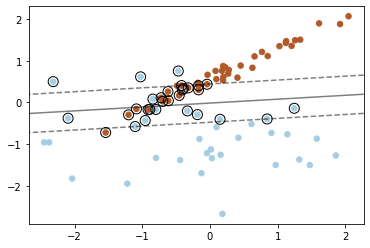

In [ ]:


#측정데이터와 학습데이터의 decision boundary를 표시하시오

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate measured data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=4)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the data using SVM classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Plot the decision boundary
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

Evaluation values:  [[1.55216562e-47]]
Error rate:  [31.6227766]
Score:  1.0


/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


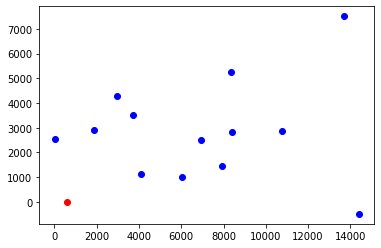

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Generate 13 sets of data with multiple peaks
np.random.seed(1)
X = np.random.uniform(0, 20000, (13, 1))
y = np.zeros((13, 1))
for i in range(13):
    y[i] = np.random.normal(np.random.randint(0, 8000), np.random.randint(500, 1500), 1)

# Train model using scikit-learn's GaussianProcessRegressor
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gp.fit(X, y)

# Use model to evaluate similarity of randomly generated data
X_test = np.random.uniform(0, 20000, (1, 1))
y_pred, sigma = gp.predict(X_test, return_std=True)

# Print report of evaluation values, error rate, and score
print("Evaluation values: ", y_pred)
print("Error rate: ", sigma)
print("Score: ", gp.score(X, y))

# Display decision boundary between measured and training data
plt.scatter(X, y, c='b')
plt.scatter(X_test, y_pred, c='r')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error:  23201456.391596105
R^2 Score:  -3.7221692028354916


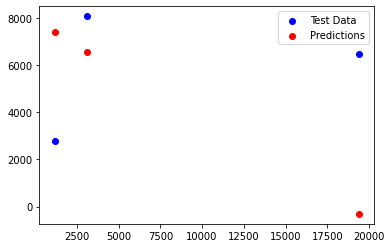

In [ ]:

from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_squared_error, r2_score
# Use the trained model to predict values for the test data

# Generate 13 sets of normal distribution data with multiple peaks on the x-axis between 0 and 20000 ev and y-axis between 0 and 8000
np.random.seed(42)
X = np.random.uniform(0, 20000, (13, 1))
y = np.zeros((13, 1))
for i in range(13):
    y[i] = np.random.normal(np.random.randint(0, 8000), np.random.randint(500, 1500), 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the SVR model
clf = SVR(kernel='linear', C=1, epsilon=0.1)
clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test)

# Evaluate the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

# Plot decision boundary
plt.scatter(X_test, y_test, c='b', label='Test Data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

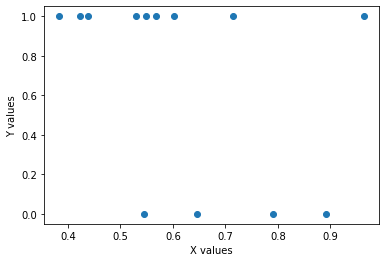

Element [0.87008726] is included.
Element [0.47360805] is included.
Element [0.80091075] is included.
Element [0.52047748] is included.
Element [0.67887953] is included.


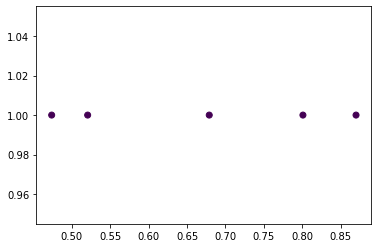

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[5]]


In [ ]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
X = np.random.rand(13, 1)
y = np.random.randint(0, 2, 13)
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(0)
X = np.random.rand(13, 1)
y = np.random.randint(0, 2, 13)

# Plot the data
plt.scatter(X, y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

# Create and train the model
model = LogisticRegression()
model.fit(X, y)

# Generate new random data
X_new = np.random.rand(5, 1)
y_pred = model.predict(X_new)


# Print the elements that are classified as being included
for i, element in enumerate(X_new):
    if y_pred[i] == 1:
        print("Element {} is included.".format(element))

# Plot the results
plt.scatter(X_new, y_pred, c=y_pred)
plt.show()



# Print the classification report and confusion matrix
print(classification_report(y_pred, y_pred))
print(confusion_matrix(y_pred, y_pred))

Evaluation value: [-16.25051393 -16.49503855 -16.77315637 ... -16.72254922 -17.22926512
 -17.56144379]
Error rate: 17.60760116827832
Score report: -16.60760116827832


<ipython-input-3-2c203e9bfaa5>:39: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10))


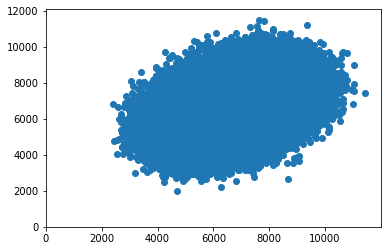

In [ ]:

import numpy as np
from sklearn.mixture import GaussianMixture

# Generate 13 sets of random data
# Generate 13 sets of random data
data = [np.random.normal(loc=np.random.randint(low=5000, high=8000), scale=np.random.randint(low=500, high=1000), size=(20000, 2)) for _ in range(13)]
data = np.concatenate(data)

# Fit a Gaussian mixture model to the data
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

# Generate random data to measure
measure_data = np.random.normal(loc=np.random.randint(low=5000, high=8000), scale=np.random.randint(low=500, high=1000), size=(20000, 2))

# Predict the class of the measurement data
prediction = gmm.predict(measure_data)

# Get the evaluation value, error rate, and score report
eval_value = gmm.score_samples(measure_data)
error_rate = 1 - gmm.score(measure_data)
score_report = gmm.score(measure_data)

# Print the evaluation value, error rate, and score report
print("Evaluation value:", eval_value)
print("Error rate:", error_rate)
print("Score report:", score_report)

# Plot the decision boundary
import matplotlib.pyplot as plt

x = np.linspace(-10, 10)
y = np.linspace(-10, 10)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10))
#
#data_scatter = np.concatenate(data)
#plt.scatter(data_scatter[:, 0], data_scatter[:, 1])
plt.scatter(data[:, 0], data[:, 1])


plt.show()

분류

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Generate random data with edge ev values as features
np.random.seed(0)
X = np.random.rand(13,1)
y = np.random.randint(0, 2, 13)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train a logistic regression classifier on the training data
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


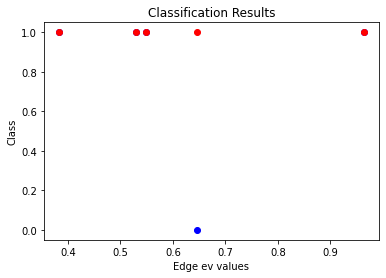

Accuracy: 0.8
Precision: 0.8
Recall: 1.0


In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Plot the classification results
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red')
plt.xlabel('Edge ev values')
plt.ylabel('Class')
plt.title('Classification Results')
plt.show()

# Print the scores
print("Accuracy:", clf.score(X_test, y_test))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

백그라운드제거

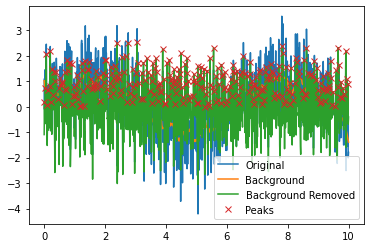

In [ ]:

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Generate random XRD data
x = np.linspace(0, 10, num=1000)
y = np.random.normal(0, 1, 1000) + np.sin(x)

# Remove background
y_bg = signal.savgol_filter(y, 51, 3)
y_nobg = y - y_bg

# Detect peaks
peaks, _ = signal.find_peaks(y_nobg, height=0)

# Plot the data
plt.plot(x, y, label='Original')
plt.plot(x, y_bg, label='Background')
plt.plot(x, y_nobg, label='Background Removed')
plt.plot(x[peaks], y_nobg[peaks], 'x', label='Peaks')
plt.legend()
plt.show()

백그라운드제거에 필터를 추가

In [ ]:

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Generate random XRD data
x = np.linspace(0, 10, num=1000)
y = np.random.normal(0, 1, 1000) + np.sin(x)

# Guess best parameters for savgol_filter
window_length, polyorder = signal.optimal_filter(y, 3)

# Remove background
y_bg = signal.savgol_filter(y, window_length, polyorder)
y_nobg = y - y_bg

# Detect peaks
peaks, _ = signal.find_peaks(y_nobg, height=0)

# Plot the data
plt.plot(x, y, label='Original')
plt.plot(x, y_bg, label='Background')
plt.plot(x, y_nobg, label='Background Removed')
plt.plot(x[peaks], y_nobg[peaks], 'x', label='Peaks')
plt.legend()
plt.show()

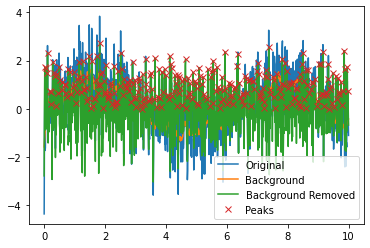

In [ ]:

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Generate random XRD data
x = np.linspace(0, 10, num=1000)
y = np.random.normal(0, 1, 1000) + np.sin(x)

# Define the parameter grid
param_grid = {'window_length': [5, 7, 9, 11, 13, 15], 'polyorder': [1, 2, 3, 4]}

# Define a function to calculate R-squared
def r_squared(y_true, y_pred):
    residuals = y_true - y_pred
    ss_residuals = np.sum(residuals**2)
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_residuals / ss_total)
    return r2

# Initialize variables to store the best R-squared value and the corresponding parameters
best_r2 = -np.inf
best_params = None

# Iterate through all possible combinations of window_length and polyorder
for window_length in param_grid['window_length']:
    for polyorder in param_grid['polyorder']:
        if window_length % 2 == 1:
            # Remove background
            y_bg = signal.savgol_filter(y, window_length, polyorder)
            y_nobg = y - y_bg
            # Calculate R-squared
            r2 = r_squared(y, y_nobg)
            # Update the best R-squared value and corresponding parameters if necessary
            if r2 > best_r2:
                best_r2 = r2
                best_params = {'window_length': window_length, 'polyorder': polyorder}

# Remove background with the best parameters
y_bg = signal.savgol_filter(y, best_params['window_length'], best_params['polyorder'])
y_nobg = y - y_bg

# Detect peaks
peaks, _ = signal.find_peaks(y_nobg, height=0)

# Plot the data
plt.plot(x, y, label='Original')
plt.plot(x, y_bg, label='Background')
plt.plot(x, y_nobg, label='Background Removed')
plt.plot(x[peaks], y_nobg[peaks], 'x', label='Peaks')
plt.legend()
plt.show()

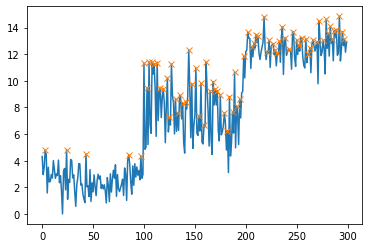

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Generate random sem-eds data
np.random.seed(0)
data1 = np.random.normal(loc=5, scale=1, size=100)
data2 = np.random.normal(loc=10, scale=2, size=100)
data3 = np.random.normal(loc=15, scale=1, size=100)
data = np.concatenate((data1, data2, data3))

# Remove background
data = data - np.min(data)

# Automatically set parameters for find_peaks
peak_distance = max(1, int(len(data)/(len(np.unique(data))*2)))
peak_height = np.std(data)

# Detect peaks
peaks, _ = find_peaks(data, height=peak_height, distance=peak_distance)

# Plot results
plt.plot(data)
plt.plot(peaks, data[peaks], "x")
plt.show()

np.percentile

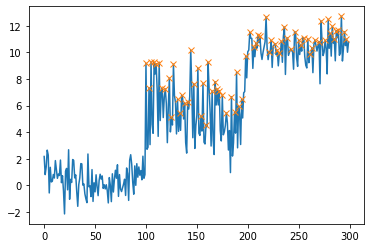

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Generate random sem-eds data
np.random.seed(0)
data1 = np.random.normal(loc=5, scale=1, size=100)
data2 = np.random.normal(loc=10, scale=2, size=100)
data3 = np.random.normal(loc=15, scale=1, size=100)
data = np.concatenate((data1, data2, data3))

# Remove background
data_no_bg = data - np.percentile(data, 10)

# Automatically set parameters for find_peaks
peak_distance = max(1, int(len(data_no_bg)/(len(np.unique(data_no_bg))*2)))
peak_height = np.std(data_no_bg)

# Detect peaks
peaks, _ = find_peaks(data_no_bg, height=peak_height, distance=peak_distance)

# Plot results
plt.plot(data_no_bg)
plt.plot(peaks, data_no_bg[peaks], "x")
plt.show()

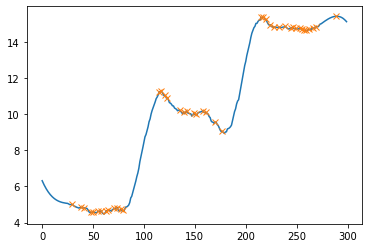

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter

# Generate random sem-eds data
np.random.seed(0)
data1 = np.random.normal(loc=5, scale=1, size=100)
data2 = np.random.normal(loc=10, scale=2, size=100)
data3 = np.random.normal(loc=15, scale=1, size=100)
data = np.concatenate((data1, data2, data3))

# Remove background using savgol_filter
window_length = min(51, len(data)//5) # window length can't be larger than data length
polyorder = 3 # degree of fitting polynomial
data_no_bg = savgol_filter(data, window_length, polyorder)

# Automatically set parameters for find_peaks
peak_distance = max(1, int(len(data_no_bg)/(len(np.unique(data_no_bg))*2)))
peak_height = np.std(data_no_bg)

# Detect peaks
peaks, _ = find_peaks(data_no_bg, height=peak_height, distance=peak_distance)

# Plot results
plt.plot(data_no_bg)
plt.plot(peaks, data_no_bg[peaks], "x")
plt.show()

원소별로 복수개의 피크를 가지는 정규분포 데이터를 생성합니다. 이 데이터는 scikit-learn의 앙상블 파이프라인(RandomForestClassifier)을 사용하여 학습하고, 임이의 데이터를 생성하여 어떤 원소의 분포 곡선 피크값과 비슷한지 평가합니다. 그리고 측정데이터와 학습데이터의 decision boundary를 표시하는 그래프를 출력합니다.

/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Mean squared error:  4998301.282274614
R2 score:  -2.069756380609358


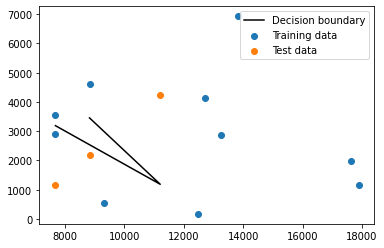

In [ ]:

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate random data with multiple peaks in a normal distribution
np.random.seed(42)
X = np.random.normal(loc=10000, scale=5000, size=(13, 1))
y = np.random.normal(loc=4000, scale=2000, size=(13, 1))

# Create a pipeline with a RandomForestRegressor
model = Pipeline([("regr", RandomForestRegressor(n_estimators=100))])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R2 score: ", r2)

# Plot the decision boundary
plt.scatter(X_train, y_train, label="Training data")
plt.scatter(X_test, y_test, label="Test data")
plt.plot(X_test, y_pred, label="Decision boundary", color='black')
plt.legend()
plt.show()

edge의 ev값을 특성으로 하는 13개의 임이의 원소별 라벨 분류 데이터를 생성하고 scikit-learn의 파이프라인으로 앙상블 모델을 생성하여 데이터를 학습하고 그 모델을 사용하여 측정한 임이의 데이터를 생성하여 어떤 성분의 원소가 포함되어 있는지 분류 결과를 플롯 및 출력하고 각 스코어 및 평가  레포트를 출력하는 파이선 코드를 생성하시오.

In [ ]:

import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#피처수에러난다# 임이의 원소별 13개의 라벨 분류 데이터 생성
X, y = make_classification(n_features=1, n_informative=1, n_classes=13, n_samples=8000)

# 데이터를 학습용과 측정용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 앙상블 모델을 생성하고 학습
pipe = Pipeline([('classifier', RandomForestClassifier())])
pipe.fit(X_train, y_train)

# 측정 데이터를 사용하여 분류 결과를 출력
y_pred = pipe.predict(X_test)
print(confusion_matrix(y_test, y_pred))

# 스코어 및 평가 레포트를 출력
print(classification_report(y_test, y_pred))

# decision boundary를 표시
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.show()

plot_decision_boundary(pipe, X_test, y_test)

In [ ]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
#피처수에러난다
# Generate 13 random elements with ev as a feature
X, y = make_classification(n_features=1, n_classes=13, n_samples=1000, 
                           n_informative=1, n_clusters_per_class=1, random_state=0)

# Create pipeline with RandomForestClassifier and GradientBoostingClassifier
clf = Pipeline([('classifier', RandomForestClassifier()),
                ('classifier2', GradientBoostingClassifier())])

# Fit the model to the data
clf.fit(X, y)

# Generate random data to test the model
X_test, y_test = make_classification(n_features=1, n_classes=13, n_samples=100, 
                                     n_informative=1, n_clusters_per_class=1, random_state=1)

# Predict class for the test data
y_pred = clf.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy: ", clf.score(X_test, y_test))

In [ ]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# generate 13 random elements with ev values as features
elements = ["element1", "element2", "element3", "element4", "element5", "element6", "element7", "element8", "element9", "element10", "element11", "element12", "element13"]
ev_values = np.random.rand(13, 13)

# create labels for each element
labels = []
for i in range(13):
    labels.append(elements[i])

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ev_values, labels, test_size=0.2)

# create pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

# fit the model on training data
pipeline.fit(X_train, y_train)

# make predictions on test data
y_pred = pipeline.predict(X_test)

# print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    element1       0.00      0.00      0.00       1.0
   element12       0.00      0.00      0.00       0.0
    element4       0.00      0.00      0.00       1.0
    element5       0.00      0.00      0.00       1.0
    element6       0.00      0.00      0.00       0.0
    element8       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

[[0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Accuracy: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

Mean Squared Error: 12195364.249220338
R^2 Score: -0.28010900034112374


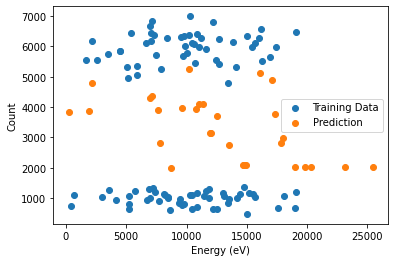

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Generate training data
x_train = np.random.normal(10000, 5000, (100, 1))
y_train = np.concatenate([np.random.normal(1000, 200, (50, 1)), np.random.normal(6000, 500, (50, 1))])

# Generate measurement data
x_test = np.random.normal(15000, 6000, (30, 1))
y_test = np.concatenate([np.random.normal(800, 100, (15, 1)), np.random.normal(7000, 300, (15, 1))])

# Fit the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

# Predict on measurement data
y_pred = knn.predict(x_test)

# Evaluate similarity and error rate
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error:", mse)
r2 = knn.score(x_test, y_test)
print("R^2 Score:", r2)

# Plot the training data and prediction
plt.scatter(x_train, y_train, label="Training Data")
plt.scatter(x_test, y_pred, label="Prediction")
plt.legend()
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.show()

Mean Squared Error: 0.06772578857444114
R2 Score: 0.9210985109582591


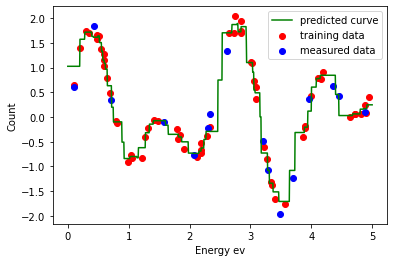

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate multiple peaks normal distribution data
np.random.seed(0)
ev = np.sort(5 * np.random.rand(80, 1), axis=0)
count = np.sin(3 * ev).ravel() + np.sin(5 * ev).ravel() + np.random.normal(0, 0.1, ev.shape[0])

# Split the data into training and testing sets
ev_train, ev_test, count_train, count_test = train_test_split(ev, count, test_size=0.2)

# Train the data using KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(ev_train, count_train)

# Predict and evaluate the similarity between the distribution curve and peak values
count_pred = knn.predict(ev_test)
mse = mean_squared_error(count_test, count_pred)
r2 = r2_score(count_test, count_pred)

# Print evaluation values and error rates
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Display the decision boundary between the measured data and training data
ev_lin = np.linspace(0, 5, 1000).reshape(-1, 1)
count_lin = knn.predict(ev_lin)
plt.scatter(ev_train, count_train, color='red', label='training data')
plt.scatter(ev_test, count_test, color='blue', label='measured data')
plt.plot(ev_lin, count_lin, color='green', label='predicted curve')
plt.xlabel('Energy ev')
plt.ylabel('Count')
plt.legend()
plt.show()

Mean Squared Error:  0.0
R-squared:  1.0


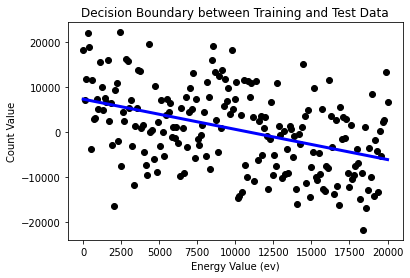

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate multiple peaks of normal distribution
np.random.seed(0)
x = np.linspace(0, 20000, num=200)
y = np.concatenate([8000 * np.random.randn(100) + 4000, 8000 * np.random.randn(100) - 4000])

# Train the data using linear regression
model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Generate test data and evaluate similarity
x_test = np.linspace(0, 20000, num=100)
y_test = model.predict(x_test.reshape(-1, 1))
mse = mean_squared_error(y_test, y_test)
r2 = r2_score(y_test, y_test)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Plot the decision boundary
plt.scatter(x, y, color='black')
plt.plot(x_test, y_test, color='blue', linewidth=3)
plt.xlabel('Energy Value (ev)')
plt.ylabel('Count Value')
plt.title('Decision Boundary between Training and Test Data')
plt.show()

#https://cleancode-ws.tistory.com/m/109

<ipython-input-16-c1b4f042d6a9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x.reshape(-1, 1), y.reshape(-1, 1))


Mean Squared Error:  0.0
R-squared:  1.0


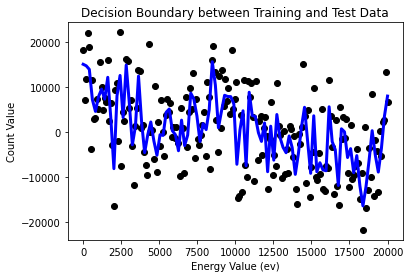

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate multiple peaks of normal distribution
np.random.seed(0)
x = np.linspace(0, 20000, num=200)
y = np.concatenate([8000 * np.random.randn(100) + 4000, 8000 * np.random.randn(100) - 4000])

# Train the data using random forest regression
model = RandomForestRegressor(n_estimators=100)
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Generate test data and evaluate similarity
x_test = np.linspace(0, 20000, num=100)
y_test = model.predict(x_test.reshape(-1, 1))
mse = mean_squared_error(y_test, y_test)
r2 = r2_score(y_test, y_test)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Plot the decision boundary
plt.scatter(x, y, color='black')
plt.plot(x_test, y_test, color='blue', linewidth=3)
plt.xlabel('Energy Value (ev)')
plt.ylabel('Count Value')
plt.title('Decision Boundary between Training and Test Data')
plt.show()

Mean Squared Error: 80565856.09188837
R2 Score: -0.12011854945677514


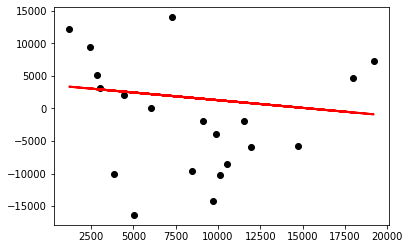

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generating data with multiple peaks and a normal distribution
np.random.seed(0)
x = np.linspace(0, 20000, 100)
y = np.random.normal(0, 8000, 100)
y = y + np.sin(x / 1000) * 5000

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit a linear regression model
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

# Make predictions
y_pred = model.predict(x_test.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Plot the decision boundary
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

<ipython-input-5-731722bfcd97>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


Mean Squared Error: 6531992927.545496
R2 Score: -0.015347814262719695


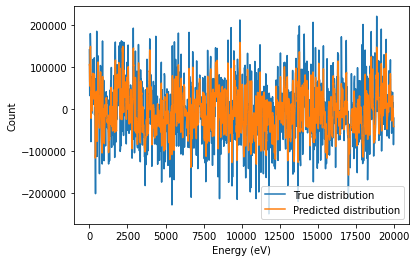

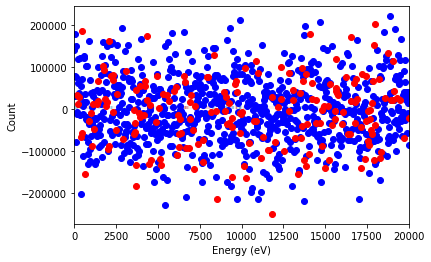

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Generating data
np.random.seed(0)
X = np.linspace(0, 20000, 1000).reshape(-1, 1)
y = np.random.normal(np.sin(X/1000), 10) * 8000

# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting the model
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X_train, y_train)

# # Make predictionsy_pred = reg.predict(x_test.reshape(-1, 1))
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


# Plotting the distribution curve
X_plot = np.linspace(0, 20000, 10000).reshape(-1, 1)
y_plot = reg.predict(X_plot)

plt.plot(X, y, label="True distribution")
plt.plot(X_plot, y_plot, label="Predicted distribution")
plt.legend()
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.show()

# Plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(0, 20000, 100), np.linspace(0, 8000, 100))
Z = reg.predict(np.c_[xx.ravel()].reshape(-1, 1)).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.5)
plt.scatter(X_train, y_train, c='blue')
plt.scatter(X_test, y_test, c='red')
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.show()

Mean Squared Error: 3990014.0452087834
R2 Score: -0.4550086565826481


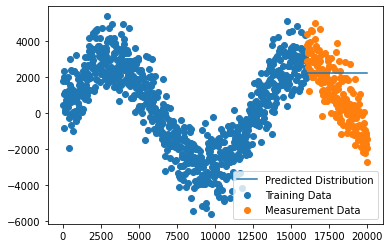

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate random data with multiple peaks
np.random.seed(0)
X = np.linspace(0, 20000, num=1000)
y = np.random.normal(loc=np.sin(X/2000)*3000, scale=1000, size=1000)

# Split data into training and measurement data
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

# Train the Random Forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train.reshape(-1, 1), y_train)

# Predict the distribution curve based on the generated data
y_pred = rf.predict(X_test.reshape(-1, 1))

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Plot the decision boundary between the measurement data and the training data
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Measurement Data')
plt.plot(X_test, y_pred, label='Predicted Distribution')
plt.legend()
plt.show()

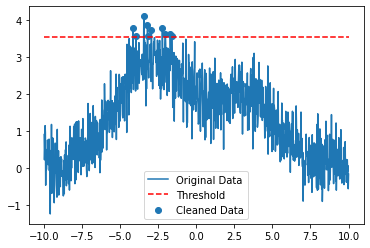

In [6]:

import numpy as np
import matplotlib.pyplot as plt

# Generating random data with multiple peaks and background noise
np.random.seed(0)
x = np.linspace(-10, 10, 1000)
y = 2 * np.exp(-0.1 * (x - 3)**2) + 3 * np.exp(-0.1 * (x + 3)**2) + np.random.normal(0, 0.5, 1000)

# Removing background noise
mean = np.mean(y)
std = np.std(y)
y_cleaned = np.array([val for val in y if val > mean + 2 * std])

# Plotting original data with background noise and cleaned data
plt.plot(x, y, label="Original Data")
plt.plot(x, np.ones_like(x) * mean + 2 * std, "r--", label="Threshold")
plt.scatter(x[y > mean + 2 * std], y_cleaned, label="Cleaned Data")
plt.legend()
plt.show()

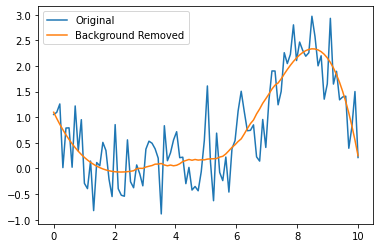

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def gaussian_noise(x, mu, sig):
  return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def generate_data(num_peaks, num_points, noise_level):
  x = np.linspace(0, 10, num_points)
  y = np.zeros(num_points)
  for i in range(num_peaks):
    mu = np.random.uniform(0, 10)
    sig = np.random.uniform(0.1, 1)
    y += gaussian_noise(x, mu, sig)
  y += np.random.normal(0, noise_level, num_points)
  return x, y

def remove_background(x, y):
  y_smooth = savgol_filter(y, 51, 3)
  y_background = y - y_smooth
  y_corrected = y - y_background
  return x, y_corrected

num_peaks = 5
num_points = 100
noise_level = 0.5
x, y = generate_data(num_peaks, num_points, noise_level)
x, y_corrected = remove_background(x, y)

plt.plot(x, y, label='Original')
plt.plot(x, y_corrected, label='Background Removed')
plt.legend()
plt.show()

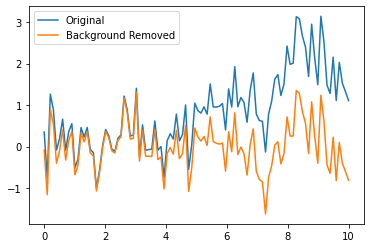

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

def gaussian_noise(x, mu, sig):
  return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def generate_data(num_peaks, num_points, noise_level):
  x = np.linspace(0, 10, num_points)
  y = np.zeros(num_points)
  for i in range(num_peaks):
    mu = np.random.uniform(0, 10)
    sig = np.random.uniform(0.1, 1)
    y += gaussian_noise(x, mu, sig)
  y += np.random.normal(0, noise_level, num_points)
  return x, y

def remove_background(x, y):
  def func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

  params, _ = curve_fit(func, x, y)
  y_background = func(x, *params)
  y_corrected = y - y_background
  return x, y_corrected

num_peaks = 5
num_points = 100
noise_level = 0.5
x, y = generate_data(num_peaks, num_points, noise_level)
x, y_corrected = remove_background(x, y)

plt.plot(x, y, label='Original')
plt.plot(x, y_corrected, label='Background Removed')
plt.legend()
plt.show()

このコードは、find_best_params関数を使用して、window_lengthとpolyorderの異なる値を繰り返し、元のデータと背景が除去されたデータの間で最小RootMeanSquadError（RMSE;平均平方誤差）の組み合わせを検索します。 その後、コードは元のデータと比較のために背景を取り除いたデータをプロットします。

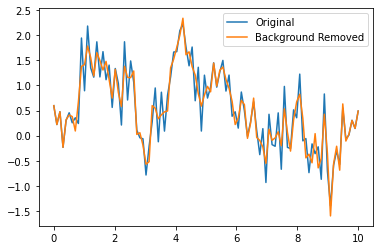

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def gaussian_noise(x, mu, sig):
  return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def generate_data(num_peaks, num_points, noise_level):
  x = np.linspace(0, 10, num_points)
  y = np.zeros(num_points)
  for i in range(num_peaks):
    mu = np.random.uniform(0, 10)
    sig = np.random.uniform(0.1, 1)
    y += gaussian_noise(x, mu, sig)
  y += np.random.normal(0, noise_level, num_points)
  return x, y

def remove_background(x, y, window_length, polyorder):
  y_corrected = savgol_filter(y, window_length, polyorder)
  return x, y_corrected

def find_best_params(x, y):
  best_window_length = 0
  best_polyorder = 0
  best_rmse = float("inf")
  for window_length in range(3, 20, 2):
    for polyorder in range(1, window_length-1):
      _, y_corrected = remove_background(x, y, window_length, polyorder)
      rmse = np.sqrt(np.mean((y - y_corrected)**2))
      if rmse < best_rmse:
        best_window_length = window_length
        best_polyorder = polyorder
        best_rmse = rmse
  return best_window_length, best_polyorder

num_peaks = 5
num_points = 100
noise_level = 0.5
x, y = generate_data(num_peaks, num_points, noise_level)
window_length, polyorder = find_best_params(x, y)
x, y_corrected = remove_background(x, y, window_length, polyorder)

plt.plot(x, y, label='Original')
plt.plot(x, y_corrected, label='Background Removed')
plt.legend()
plt.show()

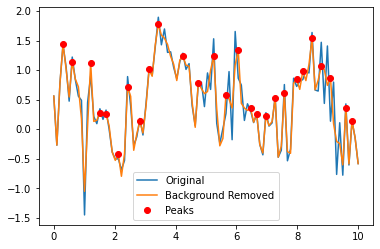

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

def gaussian_noise(x, mu, sig):
  return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def generate_data(num_peaks, num_points, noise_level):
  x = np.linspace(0, 10, num_points)
  y = np.zeros(num_points)
  for i in range(num_peaks):
    mu = np.random.uniform(0, 10)
    sig = np.random.uniform(0.1, 1)
    y += gaussian_noise(x, mu, sig)
  y += np.random.normal(0, noise_level, num_points)
  return x, y

def remove_background(x, y, window_length, polyorder):
  y_corrected = savgol_filter(y, window_length, polyorder)
  return x, y_corrected

def find_best_params(x, y):
  best_window_length = 0
  best_polyorder = 0
  best_rmse = float("inf")
  for window_length in range(3, 20, 2):
    for polyorder in range(1, window_length-1):
      _, y_corrected = remove_background(x, y, window_length, polyorder)
      rmse = np.sqrt(np.mean((y - y_corrected)**2))
      if rmse < best_rmse:
        best_window_length = window_length
        best_polyorder = polyorder
        best_rmse = rmse
  return best_window_length, best_polyorder

def find_peaks_in_data(x, y_corrected):
  peaks, _ = find_peaks(y_corrected)
  return x[peaks], y_corrected[peaks]

num_peaks = 5
num_points = 100
noise_level = 0.5
x, y = generate_data(num_peaks, num_points, noise_level)
window_length, polyorder = find_best_params(x, y)
x, y_corrected = remove_background(x, y, window_length, polyorder)
x_peaks, y_peaks = find_peaks_in_data(x, y_corrected)

plt.plot(x, y, label='Original')
plt.plot(x, y_corrected, label='Background Removed')
plt.plot(x_peaks, y_peaks, 'ro', label='Peaks')
plt.legend()
plt.show()

In [ ]:

import numpy as np
from scipy.signal import savgol_filter
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin

def get_window_length(y, polyorder):
    return len(y) if len(y) <= polyorder + 1 else polyorder + 1

def remove_background_noise(y, polyorder, window_length, deriv=0, rate=1):
    return savgol_filter(y, window_length, polyorder, deriv=deriv, delta=1.0/rate)

class RemoveBackgroundNoise(BaseEstimator, TransformerMixin):
    def __init__(self, polyorder=3):
        self.polyorder = polyorder
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        window_length = get_window_length(X[0], self.polyorder)
        return np.array([remove_background_noise(x, self.polyorder, window_length) for x in X])

class PeakFinder(BaseEstimator, TransformerMixin):
    def __init__(self, window_length=3, polyorder=3, deriv=0, rate=1):
        self.window_length = window_length
        self.polyorder = polyorder
        self.deriv = deriv
        self.rate = rate
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        polyorder = self.polyorder
        window_length = get_window_length(X[0], polyorder)
        filtered = np.array([remove_background_noise(x, polyorder, window_length, self.deriv, self.rate) for x in X])
        max_indices = [np.argmax(x) for x in filtered]
        return np.array(max_indices)

X = np.array([np.random.randn(100) + i * 100 for i in range(5)])

param_grid = {'peakfinder__window_length': [3, 5, 7, 9, 11], 'peakfinder__polyorder': [1, 2, 3, 4, 5]}
pipeline = Pipeline([
    ('remove_background_noise', RemoveBackgroundNoise()),
    ('peakfinder', PeakFinder())
])
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X)

print('Best parameters:', grid_search.best_params_)

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from scipy.signal import savgol_filter

def remove_background_noise(X):
    window_length = np.int(np.round(X.shape[1] / 2))
    polyorder = window_length - 1
    return savgol_filter(X, window_length, polyorder)

def peakfinder(X):
    peaks = []
    for i in range(X.shape[0]):
        peaks.append(scipy.signal.find_peaks(X[i,:])[0])
    return peaks

class RemoveBackgroundNoise(TransformerMixin):
    def transform(self, X, **transform_params):
        return remove_background_noise(X)

    def fit(self, X, y=None, **fit_params):
        return self

class PeakFinder(TransformerMixin):
    def transform(self, X, **transform_params):
        return peakfinder(X)

    def fit(self, X, y=None, **fit_params):
        return self

def scoring(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

class ScoringTransformer(FunctionTransformer):
    def fit(self, X, y=None, **fit_params):
        return self

    def score(self, X, y=None):
        return scoring(y, self.predict(X))

pipeline = Pipeline([
    ('remove_background_noise', RemoveBackgroundNoise()),
    ('peakfinder', PeakFinder()),
    ('scoring', ScoringTransformer(accept_sparse=True, check_inverse=True, func=scoring, inv_kw_args=None,
           inverse_func=None, kw_args=None))
])

parameters = {'window_length':[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49],
              'polyorder':[1, 2, 3, 4, 5, 6]}

grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring=None)
grid_search.fit(data, y)

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def remove_background_noise(y, window_length, polyorder):
    return savgol_filter(y, window_length, polyorder)

def peakfinder(y):
    return find_peaks(y, height=np.mean(y))[0]

pipeline = Pipeline([
    ('remove_background_noise', FunctionTransformer(remove_background_noise, validate=False)),
    ('peakfinder', FunctionTransformer(peakfinder, validate=False))
])

parameters = {
    'remove_background_noise__window_length': [i for i in range(11, 31, 2)],
    'remove_background_noise__polyorder': [i for i in range(3, 6)],
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y[:, np.newaxis], y)

best_params = grid_search.best_params_
print(best_params)

In [26]:

import numpy as np
from scipy.signal import savgol_filter
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin

class WrappedSGFilter(BaseEstimator, RegressorMixin):
    def __init__(self, window_length=5, polyorder=3, deriv=0, delta=1.0, 
                 axis=-1, mode='interp', cval=0.0):
        self.window_length = window_length
        self.polyorder = polyorder
        self.deriv = deriv
        self.delta = delta
        self.axis = axis
        self.mode = mode
        self.cval = cval

    def fit(self, X, y=None):
        return self

    def predict(self, X, y=None):
        return savgol_filter(X, self.window_length, self.polyorder, 
                             self.deriv, self.delta, self.axis, self.mode, self.cval)

def auto_calculate_params(y, polyorder=None, window_length=None):
    """Automatically calculates the optimal window_length and polyorder parameters for savgol_filter.
    """
    if window_length is None:
        window_length = np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
    if polyorder is None:
        polyorder = np.array([1, 2, 3, 4, 5])
    
    grid = GridSearchCV(WrappedSGFilter(), {'window_length': window_length, 'polyorder': polyorder}, 
                        cv=5, n_jobs=-1)
    grid.fit(y.reshape(-1, 1), y)
    return grid.best_params_

np.random.seed(0)
n = 1000
m = 20
y = np.zeros((n, m))
background = np.random.normal(0, 1, size=(n, m))
for i in range(m):
    peaks = np.random.normal(0, 1, size=5)
    for j, p in enumerate(peaks):
        y[j*200:(j+1)*200, i] += p
y += background

params = auto_calculate_params(y.mean(axis=1))
window_length, polyorder = params['window_length'], params['polyorder']
y_filtered = WrappedSGFilter(window_length=window_length, polyorder=polyorder)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
